In [2]:
conda install ipywidgets -y

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\rpabot06\anaconda3\envs\prophet_env

  added / updated specs:
    - ipywidgets


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ipywidgets-8.1.5           |  py311haa95532_0         259 KB
    jupyterlab_widgets-3.0.13  |  py311haa95532_0         195 KB
    widgetsnbextension-4.0.13  |  py311haa95532_0         949 KB
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  ipywidgets         pkgs/main/win-64::ipywidgets-8.1.5-py311haa95532_0 
  jupyterlab_widgets pkgs/main/win-64::jupyterlab_widgets-3.0.13-py311haa95532_0 
  widgetsnbextension pkgs/main/win-64::widgetsnbextension-4.0.13-py311haa95532_0 



widgetsnbextension-4 | 949 KB

In [1]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# 샘플 시계열 데이터: 항공 승객 수 (월 단위)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

# Prophet이 요구하는 컬럼명 형식: 'ds' = 날짜, 'y' = 값
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

df.head()


C:\Users\rpabot06\anaconda3\envs\prophet_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
conda install -c plotly plotly -y

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# 샘플 시계열 데이터: 항공 승객 수 (월 단위)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

# Prophet이 요구하는 컬럼명 형식: 'ds' = 날짜, 'y' = 값
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

df.head()

In [1]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# 샘플 시계열 데이터: 항공 승객 수 (월 단위)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

# Prophet이 요구하는 컬럼명 형식: 'ds' = 날짜, 'y' = 값
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

df.head()


,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [2]:
# Prophet 모델 생성 및 학습
model = Prophet()
model.fit(df)

09:32:12 - cmdstanpy - INFO - Chain [1] start processing
09:32:13 - cmdstanpy - INFO - Chain [1] done processing


In [3]:
# 향후 12개월치 예측용 날짜 생성
future = model.make_future_dataframe(periods=12, freq='M')

# 예측 실행
forecast = model.predict(future)

# 결과 일부 확인
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

C:\Users\rpabot06\anaconda3\envs\prophet_env\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
151,1961-07-31,575.744718,545.807222,604.941313
152,1961-08-31,529.327492,501.117584,561.407157
153,1961-09-30,492.512168,464.870284,523.035712
154,1961-10-31,462.466940,433.785538,488.740955
155,1961-11-30,492.123343,461.325548,520.290016


C:\Users\rpabot06\anaconda3\envs\prophet_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\rpabot06\anaconda3\envs\prophet_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\rpabot06\anaconda3\envs\prophet_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\rpabot06\anaconda3\envs\prophet_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\rpabot06\anaconda3\envs\prophet_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C

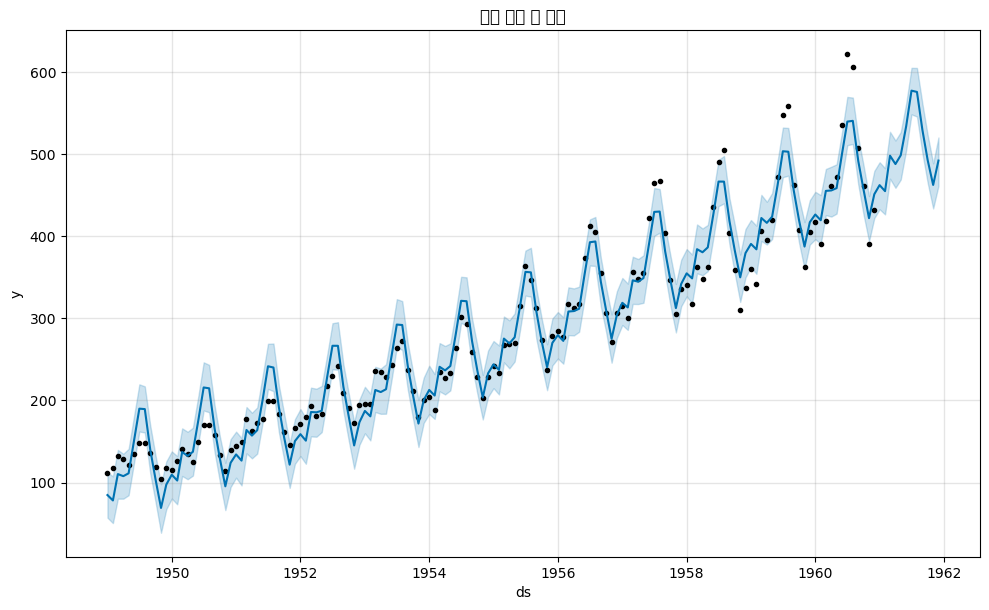

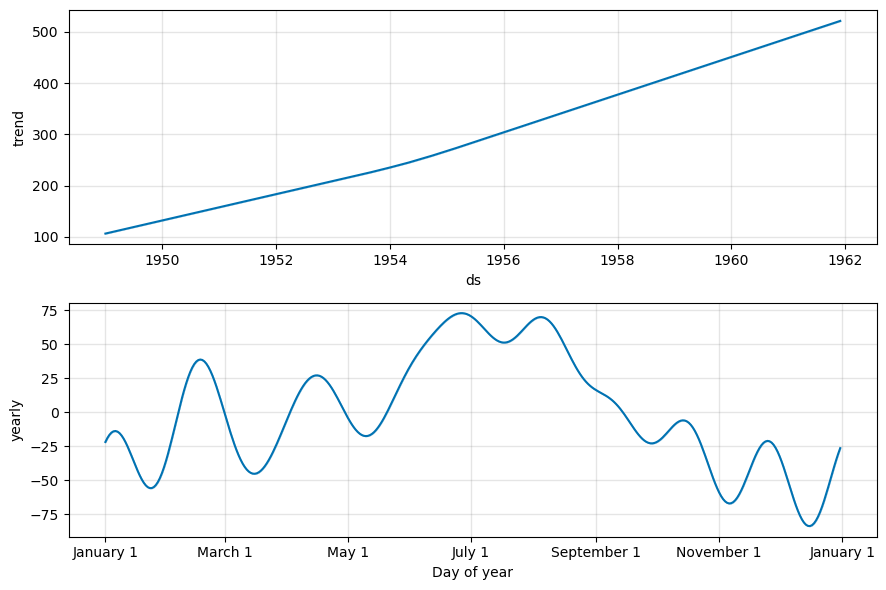

In [4]:
# 전체 예측 시각화
fig1 = model.plot(forecast)
plt.title('항공 승객 수 예측')

# 예측 구성 요소 시각화 (트렌드, 계절성 등)
fig2 = model.plot_components(forecast)